### Finding the median word length on a Rainforest QA webpage

##### Assumptions
* All hyphenated words (e.g. humans-in-the-loop, data-related) counted as one word.
* Instances of 100%, 75%, 401k, ‘e.g.’, QA and 3x were counted as one word
* Title, apply here button, header, footer and location info ("San Francisco / United States ...") were **not** included in the word count.


In [1]:
import pandas as pd
import numpy as np
import itertools as it

from bs4 import BeautifulSoup
import requests
from requests import get

In [2]:
# download source code using the det function from the requests package
page = requests.get('https://jobs.lever.co/rainforest/e7eab367-cae8-4e7b-8642-e7b66c4c00bb?ref=keyvalues')

# confirm successful download with a code '200' response
page

<Response [200]>

<!DOCTYPE html>
<head prefix="og: http://ogp.me/ns#">
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta charset="utf-8"/>
 <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
 <title>
  Rainforest QA - Data Science Generalist
 </title>
 <style>
  .template-btn-submit.hex-color {background: #00b95a;border-color: #00b056;color: white;}.template-btn-submit.hex-color:visited {color: white;}.template-btn-submit.hex-color:hover {background: #00b056;color: white;}.template-btn-submit.hex-color:active,.template-btn-submit.hex-color:focus {background: #00823f;color: white;}
 </style>
 <meta name="twitter:card" value="summary"/>
 <meta content="Rainforest QA - Data Science Generalist" name="twitter:title"/>
 <meta content="We're looking for a Data Scientist/Machine Learning Engineer with a wide range of competencies. Rainforest is changing the way people do QA and data is at the heart of how we do that. From crowd management and fraud detection to 
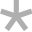

In [3]:
# great an object containing the source code and have a look
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

In [4]:
# the job description text has the class 'section page centered'; create a list of the items with that tag
body = soup.find_all('div', class_="section page-centered")

In [5]:
# loop through the list to get the just the text from each item
text = []
for i in range(0,len(body)):
    text.append(body[i].get_text())

In [6]:
# remove characters and add spacing where needed, put result in new list
words = []
for i in range(0, len(text)):
    words.append([''.join(v).strip() for k, v in it.groupby(text[i], lambda x: x in ('/()!:')) if not k])

In [7]:
# convert from a list of lists to a single list of strings
for i in range(0, len(words)):
    words[i] = ' '.join(words[i])

In [8]:
# put list into a single string containing the entire job description
word_block = ''
for i in range(0, len(words)):
    temp = ''.join(words[i])
    word_block += temp
    temp= ''

In [9]:
#insert space where a lowercase letter abuts an uppercase letter
import re
word_block = re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', word_block)
word_block

"We're looking for a Data Scientist Machine Learning Engineer with a wide range of competencies. Rainforest is changing the way people do QA and data is at the heart of how we do that. From crowd management and fraud detection to data visualization and automation research, there are myriad opportunities to use your creativity and technical skills.We are looking for someone who learns quickly and is a great communicator. Since we are a remote, distributed development team, decent writing skills and over communication is important to us. You can be based anywhere in the US including San Francisco, where our HQ is located .We regularly send our data scientists to conferences, both to speak and just learn e.g. last year we went to NIPS and KDD, this year to Europython and a couple of Py Datas . You can read about some of our work on predicting test run durations and how Kaggle can be useful in the real world. Read more about the team and culture at Rainforest QA here What you’ll do Experim

In [10]:
# fix the rest of the random spacing problems that will affect word counting
word_block = word_block.replace('Py Datas', 'PyDatas')
word_block = word_block.replace('Py Torch', 'PyTorch')
word_block = word_block.replace('401 k', '401k')
word_block = word_block.replace('attendance3x', 'attendance 3x')
word_block = word_block.replace('options100%', 'options 100%')
word_block = word_block.replace('.', ' ')
word_block = word_block.replace('e g', 'e.g.')

In [11]:
# for ease of assessing word length, create a new list containing each word of word_block as an element and have a look at it
lets_count = []
lets_count = word_block.split()
lets_count

["We're",
 'looking',
 'for',
 'a',
 'Data',
 'Scientist',
 'Machine',
 'Learning',
 'Engineer',
 'with',
 'a',
 'wide',
 'range',
 'of',
 'competencies',
 'Rainforest',
 'is',
 'changing',
 'the',
 'way',
 'people',
 'do',
 'QA',
 'and',
 'data',
 'is',
 'at',
 'the',
 'heart',
 'of',
 'how',
 'we',
 'do',
 'that',
 'From',
 'crowd',
 'management',
 'and',
 'fraud',
 'detection',
 'to',
 'data',
 'visualization',
 'and',
 'automation',
 'research,',
 'there',
 'are',
 'myriad',
 'opportunities',
 'to',
 'use',
 'your',
 'creativity',
 'and',
 'technical',
 'skills',
 'We',
 'are',
 'looking',
 'for',
 'someone',
 'who',
 'learns',
 'quickly',
 'and',
 'is',
 'a',
 'great',
 'communicator',
 'Since',
 'we',
 'are',
 'a',
 'remote,',
 'distributed',
 'development',
 'team,',
 'decent',
 'writing',
 'skills',
 'and',
 'over',
 'communication',
 'is',
 'important',
 'to',
 'us',
 'You',
 'can',
 'be',
 'based',
 'anywhere',
 'in',
 'the',
 'US',
 'including',
 'San',
 'Francisco,',
 'wher

In [12]:
# how many words are in the job description?
len(lets_count)

656

In [13]:
# a total of 656 words in the list puts the median at the agerage length of word nos. 328 and 329 (python indices 327 and 328)
lengths = []
for i in range(0, len(lets_count)):
    lengths.append(len(lets_count[i]))
lengths = sorted(lengths)

In [14]:
# the answer is 4
lengths[327:329]

[4, 4]

In [15]:
# for fun - the actual two words at the middle of the job discription (both loger than 4 letters!)
lets_count[327:329]

['experimental', 'design']

Text(0,0.5,'Count')

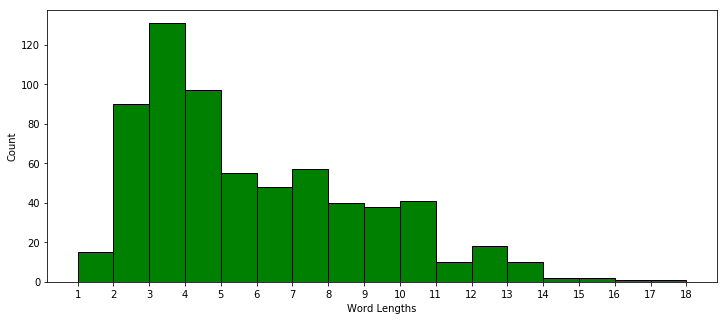

In [16]:
# more fun - a quick istogram of list lengths (not a surprise that it's right skewed)
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,5))
plt.hist(lengths, bins=17, facecolor='green', edgecolor='black')
plt.xticks(np.arange(min(lengths), max(lengths)+1, 1.0))
plt.xlabel('Word Lengths')
plt.ylabel('Count')